<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Марат! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Прогнозирование заказов такси

## Задача

Компания «Чётенькое такси» собрала исторические данные о **заказах такси в аэропортах**. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Необходимо построить модель для такого предсказания.
Значение метрики **RMSE** на тестовой выборке должно быть **не больше 48**.

Условия:
- **ресемплирование** выполнить **по одному часу**,
- **тестовая выборка размером 10% от исходных данных**.

## Подключаемые библиотеки

In [1]:
!pip install phik -q

In [2]:
!pip install catboost -q

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import phik
import seaborn as sns
import numpy as np
from datetime import timedelta

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    TimeSeriesSplit
)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder
)
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [5]:
RANDOM_STATE = 42

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Исходные данные

In [6]:
try:
    taxi_base = pd.read_csv('taxi.csv', parse_dates=[0])
except:
    taxi_base = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv', parse_dates=[0])

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Отлично, при загрузке сразу обрабатываются даты</div>

In [7]:
taxi_base.head(5)

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


## Подготовка данных

In [8]:
taxi_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [9]:
taxi_base.isna().sum()

datetime      0
num_orders    0
dtype: int64

In [10]:
taxi_base.duplicated().sum()

0

In [11]:
taxi_base = taxi_base.set_index('datetime')

In [12]:
taxi_base = taxi_base.sort_index()

In [13]:
taxi_base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, проведено первичное знакомство с данными </div>

## Исследовательский анализ данных

### Признак "num_orders"

In [14]:
taxi = taxi_base.resample('1H').sum()
taxi.head(5)

C:\Users\Marat\AppData\Local\Temp\ipykernel_5892\2733089246.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  taxi = taxi_base.resample('1H').sum()


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, ресемплирование выполнено верно. И хорошо, что в качестве агрегирующей функции ты используешь сумму, её проще интерпретировать. </div>

In [15]:
taxi.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


В датафрейме присутствуют часы, за которые не было заказов

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">

Самый первый и самый простой шаг в анализе временных рядов - это посмотреть на его график. Это гораздо проще и быстрее, чем делать декомпозицию на тренд и сезонность.
    
Поэтому первым шагом прошу тебя вывести график временного ряда (ресемплированного по часам). Можно наложить на него усредненные данные (например за сутки и неделю), это позволит лучше понять данные.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Исправил

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

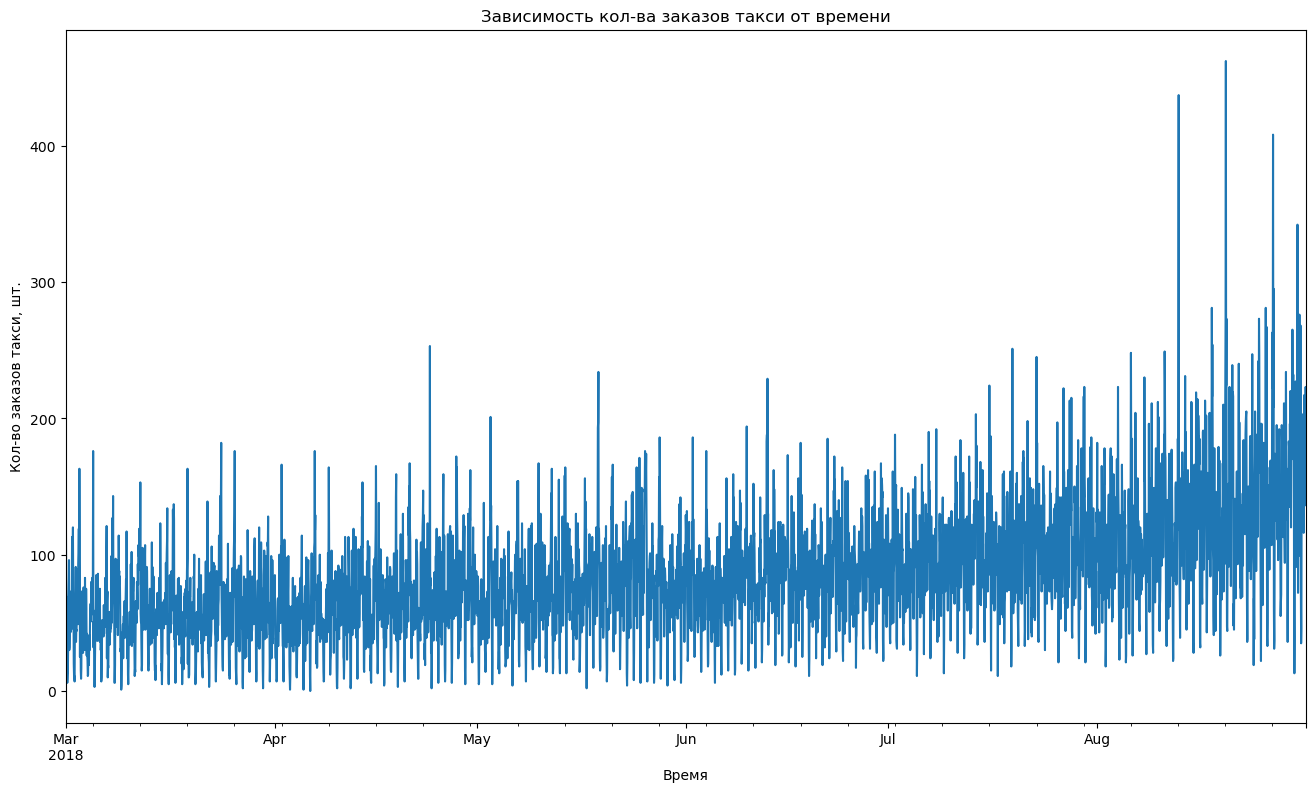

In [16]:
taxi.plot(figsize=(16, 9), legend=False)
plt.ylabel('Кол-во заказов такси, шт.')
plt.xlabel('Время')
plt.title('Зависимость кол-ва заказов такси от времени')
plt.show()

На основании графика можно сделать выводы о:
- периодичности заказов такси, что связано с периодичностью рейсов,
- периодичности всплесков, что также связано с периодичностью рейсов,
- прослеживается тренд на увеличение кол-ва заказов такси.

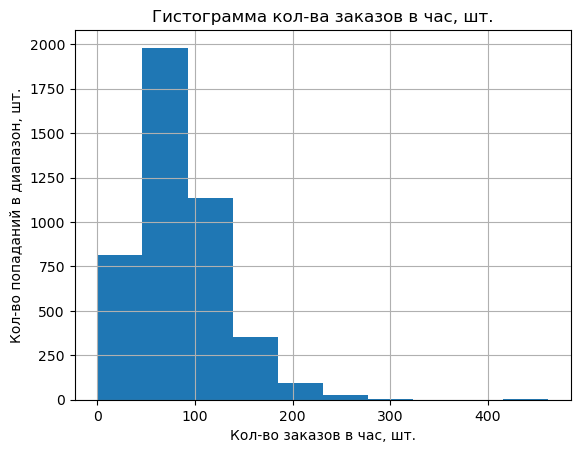

In [17]:
taxi.hist()
plt.ylabel('Кол-во попаданий в диапазон, шт.')
plt.xlabel('Кол-во заказов в час, шт.')
plt.title('Гистограмма кол-ва заказов в час, шт.')
plt.show()

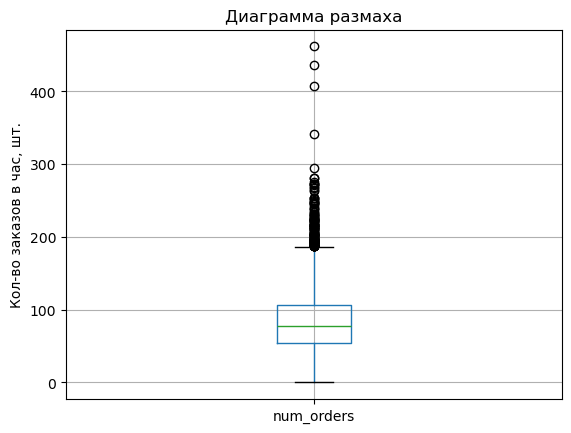

In [18]:
taxi.boxplot()
plt.ylabel('Кол-во заказов в час, шт.')
plt.title('Диаграмма размаха')
plt.show()

В среднем за час поступает 84 заявки, выбросы, скорее всего, связаны с праздниками

Вычислим значение правого "уса"

In [19]:
r_border = taxi.describe().loc['75%'] + (taxi.describe().loc['75%'] - taxi.describe().loc['25%']) * 1.5
r_border

num_orders    186.5
dtype: float64

In [20]:
taxi.index.year.unique()

Index([2018], dtype='int32', name='datetime')

В датафрейме представлены данные только за 2018 год

Исследуем датафрейм на тренды и сезонность

In [21]:
decomposed = seasonal_decompose(taxi)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Есть декомпозиция на тренд и сезонность</div>

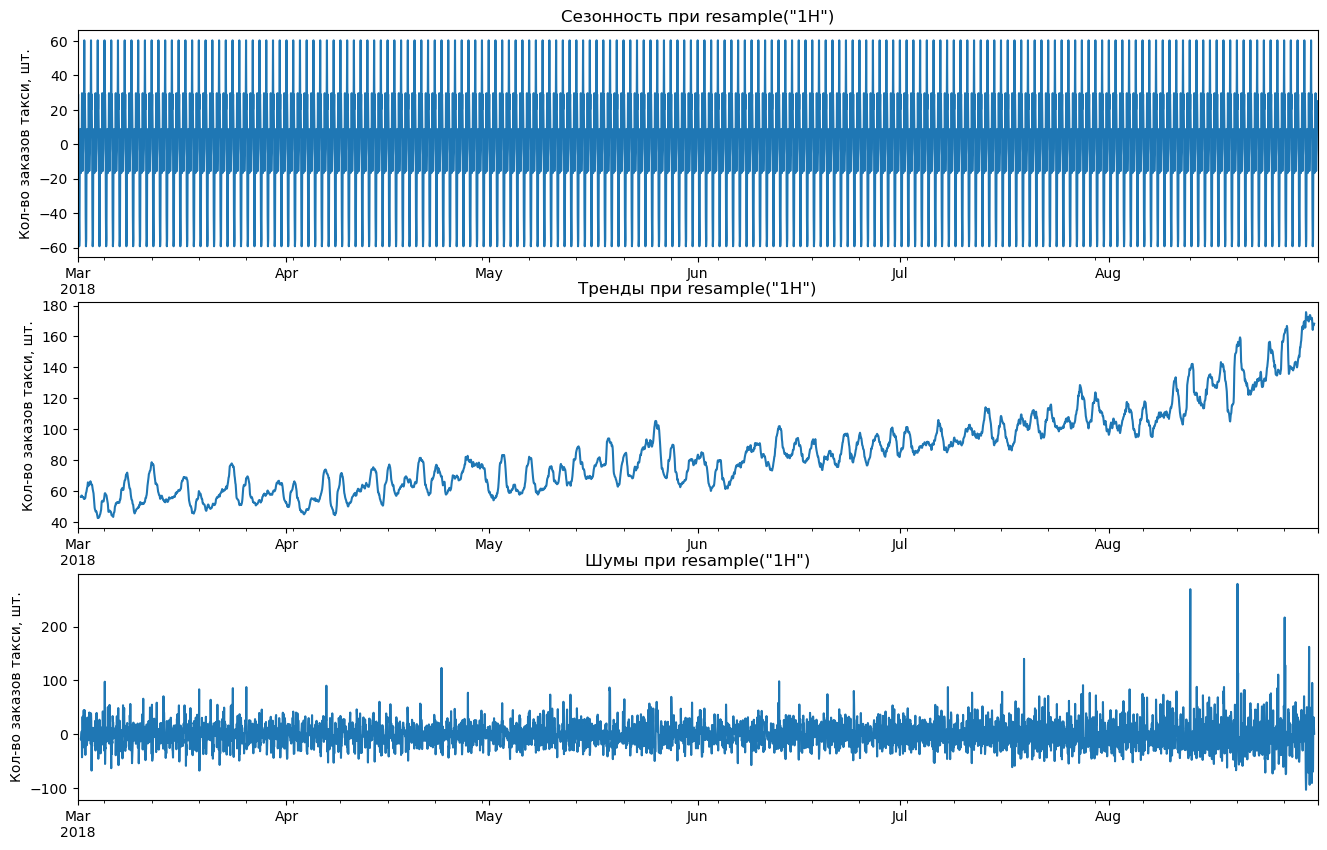

In [22]:
plt.figure(figsize=(16, 10))

ax1 = plt.subplot(3, 1, 1)
decomposed.seasonal.plot()
ax1.set_title('Сезонность при resample("1H")')
ax1.set_ylabel('Кол-во заказов такси, шт.')
ax1.set_xlabel('')

ax2 = plt.subplot(3, 1, 2)
decomposed.trend.plot()
ax2.set_title('Тренды при resample("1H")')
ax2.set_ylabel('Кол-во заказов такси, шт.')
ax2.set_xlabel('')

ax3 = plt.subplot(3, 1, 3)
decomposed.resid.plot()
ax3.set_title('Шумы при resample("1H")')
ax3.set_ylabel('Кол-во заказов такси, шт.')
ax3.set_xlabel('')

plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
 В таком виде график абсолютно нечитаем. Пожалйуста разнеси сезонность, тренд и остатки по разым полотнам. И желательно использовать всю доступную ширину.   
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Исправил

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

Есть явный тренд на увеличение кол-ва заказов такси. Сезонность тоже есть, но надо взять меньший временной интервал

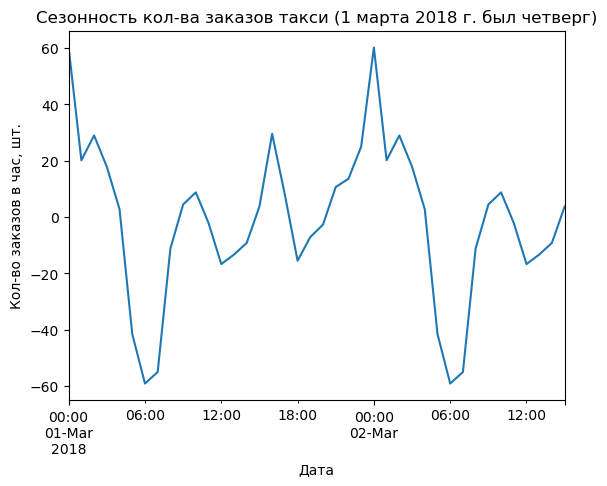

In [23]:
decomposed.seasonal.head(40).plot()
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов в час, шт.')
plt.title('Сезонность кол-ва заказов такси (1 марта 2018 г. был четверг)')
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Молодец, что уменьшил период, лучше заметна суточная сезонность.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Совет: в данных кроме суточной есть недельная сезонность. Чтобы увидеть её нужно сделать ресемплинг данных по суткам и вновь сделать декомпозицию на сезонность и тренд. Дело в том, что seasonal_decompose настраивается на сезонность с самым маленьким циклом, при ресемпле данных по часу это сутки, при ресемпле по суткам это неделя. </div>

Сезонность связана с периодичностью рейсов

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Эти наблюдения были бы логичны, если бы не одно НО: мы анализируем заказы такси из аэропорта, а там скорее вего работают совершенно другие паттерны, скорее всего завязанные на расписание прилетов.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Признаю, в задании не обратил на это внимание. Исправил

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

Увеличим интервал resample до 1 дня

In [24]:
taxi_dayRS = taxi_base.resample('1D').sum()
taxi_dayRS.head(5)

,num_orders
datetime,
2018-03-01,1364
2018-03-02,1506
2018-03-03,1290
2018-03-04,1141
2018-03-05,1259


In [25]:
decomposed_dayRS = seasonal_decompose(taxi_dayRS)

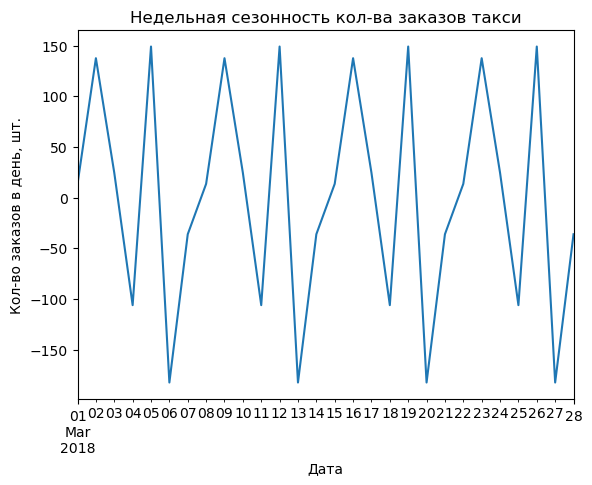

In [26]:
decomposed_dayRS.seasonal.head(28).plot()
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов в день, шт.')
plt.title('Недельная сезонность кол-ва заказов такси')
plt.show()

### Признак "hours"

Добавим новый признак 'hours'

In [27]:
taxi['hours'] = taxi.index.hour
taxi.head(5)

,num_orders,hours
datetime,,
2018-03-01 00:00:00,124,0
2018-03-01 01:00:00,85,1
2018-03-01 02:00:00,71,2
2018-03-01 03:00:00,66,3
2018-03-01 04:00:00,43,4


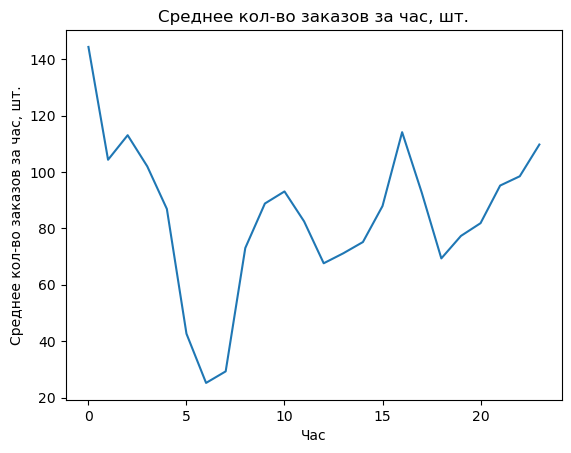

In [28]:
taxi.groupby(by='hours').mean().plot(legend=False)
plt.xlabel('Час')
plt.ylabel('Среднее кол-во заказов за час, шт.')
plt.title('Среднее кол-во заказов за час, шт.')
plt.show()

Получили график сезонности, прослеживается явная связь между кол-вом заказов и часом

### Признак "dayofweek"

Добавим новый признак 'dayofweek'

In [29]:
taxi['dayofweek'] = taxi.index.dayofweek
taxi.head(5)

,num_orders,hours,dayofweek
datetime,,,
2018-03-01 00:00:00,124,0,3
2018-03-01 01:00:00,85,1,3
2018-03-01 02:00:00,71,2,3
2018-03-01 03:00:00,66,3,3
2018-03-01 04:00:00,43,4,3


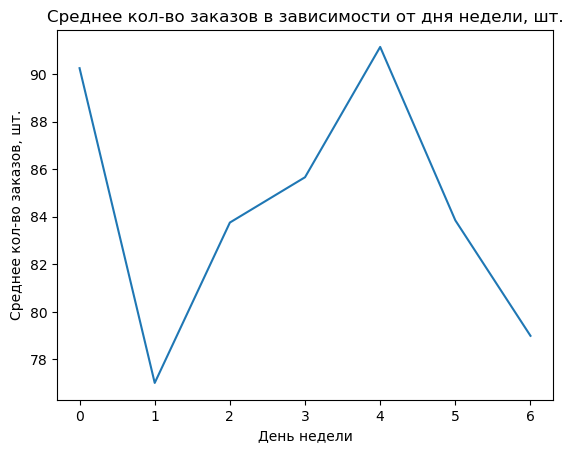

In [30]:
taxi.groupby(by='dayofweek').mean()['num_orders'].plot(legend=False)
plt.xlabel('День недели')
plt.ylabel('Среднее кол-во заказов, шт.')
plt.title('Среднее кол-во заказов в зависимости от дня недели, шт.')
plt.show()

Прослеживается зависимость между днем недели и кол-вом заказов:
- в понедельник (0) пик, так как многие опаздывают после выходных,
- в пятницу (4) пик, так как многие едут отдыхать,
- в воскресенье затишье, так как все сидят по домам

### Признак "shift_"

Добавим новый признак 'shift_'

In [31]:
for i in range(1, 25):
    taxi['shift_{}'.format(i)] = taxi['num_orders'].shift(i)

In [32]:
taxi.head(5)

,num_orders,hours,dayofweek,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,...,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,4,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Признак "rolling_mean"

Добавим новый признак 'rolling_mean'

In [33]:
taxi['rolling_mean'] = taxi['num_orders'].shift().rolling(24).mean()

In [34]:
taxi.head(5)

,num_orders,hours,dayofweek,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,...,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,4,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Анализ корреляции

In [35]:
#map = taxi.phik_matrix(interval_cols=['rolling_mean'])

In [36]:
#sns.heatmap(map, annot=True)
#plt.title('Тепловая карта признаков датафрейма "taxi"')
#plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Хорошо, что в признаки ты выносишь час, у нас четкая сезонность внутри суток.
Также очень полезный признак день недели, в данных есть недельная сезонность.
        
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Исправил, я иногда не совсем пониимаю формулировки ревьюеров. Правильно ли я понимаю, что фраза "у нас четкая сезонность внутри суток" означает, что есть зависимость кол-ва заказов от часа и дня недели?

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> Мы видели закономерности, как количество заказов меняется внутри суток (зависит от часа). А также мы видели закономерности, что количество заказов меняется в зависимости от дня недели. Такие устойчивые изменения и называются сезонностью. Поэтому мы можем говорить, что у нас есть сезонность с периодом в неделю и выделение таких признаков как час и день неделис совершенно закономерно. </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
А вот календарный признак "месяц" нужно удалить.  Данных у нас немного, всего 6 месяцев. При этом данные тренда мы учтем с помощью скользящего среднего и отстающих значений.
</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
    
Гиперпараметры max_lag, rolling_mean_size очень важны.  Возможно это самые важные гиперпараметры в проекте, больше всего влияющие на результат.
    
Выбирая значения для размера окна и количества отстающих значений важно использовать известную нам информацию о сезонности. А сезонность у нас есть суточная и недельная. Поэтому рекомендую взять их кратными суткам, а лучше равным неделе.
    
 - Скользящее среднее является олицетворением тренда, и если взять его равным суткам, то оно становится достаточно гладким (из него уходитят колебания, вызванные суточной сезонностью), а если взять равное неделе - то еще ровнее. Это хорошо видно пографикам со скользящим средним, если ты посмотришь из за сутки и неделю.
 
 - На использовании отстающих значений и авторегрессии временного ряда основано много методов прогнозироания временных рядов (например ARIMA). И здесь тоже работает принцип - чем больше признаков - тем выше качество. Но разумным компромисом является использование достаточного количества признаков, такого, где автокореляция является значимой. И такими точками как раз служат сутки и неделя. 
    
    
    
Резюме: попробуй исползьзовать гиперпараметры max_lag, rolling_mean_size одинаковыми и равными 24 (сутки)  или 168 (неделя).  Последнее значительно увеличивает качество предсказаний, но модели могут учиться дольше. 
    
----
    
Также можно исследовать автокорреляцию (смотрим последний значимый "пик" на графике частичной автокорреляционой функции. Если дефолтное количество лагов на графике будет небольшим, можешь "руками" подкрутить его до 170, чтобы увидеть "пик" на неделе.
    
```python
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(ts, alpha=None).set_size_inches(12, 4)
plt.show()

plot_acf(ts, alpha=None).set_size_inches(12, 4)
plt.show()
```    
    
    
</div>

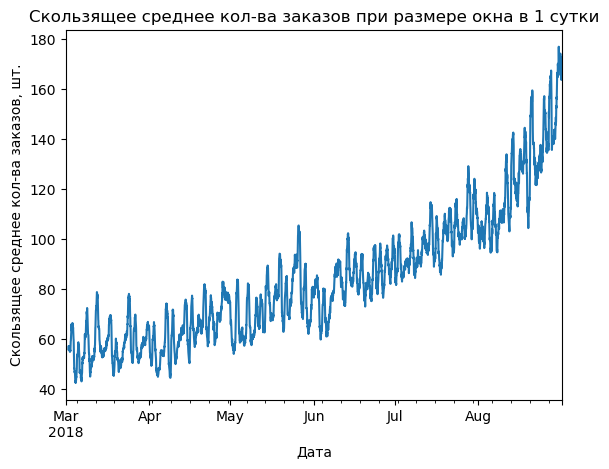

In [37]:
taxi['rolling_mean_day'] = taxi['num_orders'].shift().rolling(24).mean()
taxi.plot(y='rolling_mean_day', legend=False)
plt.xlabel('Дата')
plt.ylabel('Скользящее среднее кол-ва заказов, шт.')
plt.title('Скользящее среднее кол-ва заказов при размере окна в 1 сутки')
plt.show()

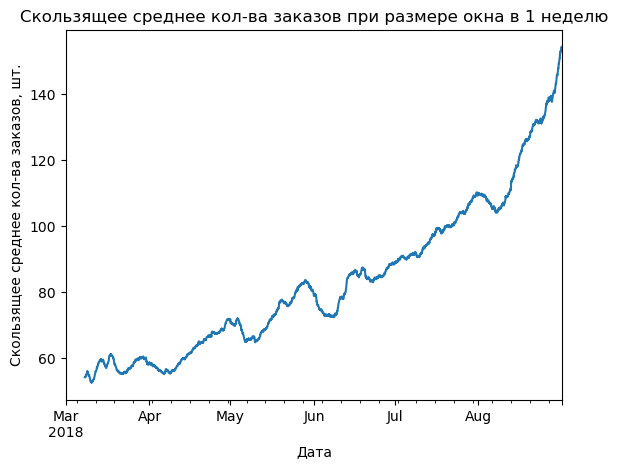

In [38]:
taxi['rolling_mean_week'] = taxi['num_orders'].shift().rolling(168).mean()
taxi.plot(y='rolling_mean_week', legend=False)
plt.xlabel('Дата')
plt.ylabel('Скользящее среднее кол-ва заказов, шт.')
plt.title('Скользящее среднее кол-ва заказов при размере окна в 1 неделю')
plt.show()

При увеличении значения окна скользящего среднего график выравнивается, т.е. пропадают колебания

In [39]:
taxi = taxi.drop(['rolling_mean_day', 'rolling_mean_week'], axis=1)

## Построение модели

In [40]:
train, test = train_test_split(taxi, shuffle=False, test_size=0.1, random_state=RANDOM_STATE)
train = train.dropna()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Корректное разбиение, данные не перемешиваются. </div>

In [41]:
X_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']

X_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']

In [42]:
num_columns = X_test.columns.drop(['hours', 'dayofweek'])
ohe_columns = ['hours', 'dayofweek']

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
 
    
 Для линейных моделей стоит  рассмотреть признаки "час" и "день недели" как категориальные, а не числовые и соответственно применить к ним OHE кодирование (конечно же с использованием pipeline и ColumnTransformer)
    
 ---------------
    
Можно также рассмотреть альтернативные варианты кодирования категориальных признаков. Для временных рядов очень популярно кодирование с помощью тригонометрических функций  (https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html).    
    
Или попробовать использовать TargetEncoder (изначально появился в библиотеке category_encoders, его более безопасный аналог появился в последних версиях sklearn).
    
Если просто - этот энкодер будет кодировать признак час используя "среднее количество поездок за час", аналогично с днем недели.    
    
</div>

In [43]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [44]:
data_preprocessor = ColumnTransformer(
    [
        ('num', StandardScaler(), num_columns),
        ('ohe', ohe_pipe, ohe_columns)
    ], 
    remainder='passthrough'
)

In [45]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
)

In [46]:
param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 15)
    },

    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
        'models': [SVR()],
        'models__kernel': ['linear', 'rbf'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
        'models': [CatBoostRegressor(random_state=RANDOM_STATE)]
    }
]

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
 
    
Вижу ты активно перебираешь скейлеры и для меня это четкий сигнал, что ты не понимаешь, зачем и где их нужно применять.
    
Давай я задам тебе вопросы, которые стоит для себя разобрать (наверняка пригодится для собеседований)
    
 - Вспомни как строится модель дерева решений и ответь на вопрос, влияет ли масштаб признаков на построения дерева?
 - Ответ на предыдущий вопрос постарайся обобщить на ансамби (деревья решений и бустинги)
    
---------
    
Что касается линейных моделей, подумай зачем нужен скейлер для линейной модели. Рассматриваем три кейса
 - Простая линейная регрессия, аналитичекое решение (через обращение матриц). Тут сразу дам подсказку - масштаб признаков теоретически не влияет, но на практике нужно использовать какое-нибудь масштабирование для численной стабильности вычислений
 - Модели с регуляризацией (Ridge/Lasso). Тут масштаб признаков будет влиять на регуляризацию.  Поэтому перебор скелеров разумен (и использование скейлера тоже обязательно). 
 - Для SVR насколько я помню тоже можно оставить.
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Про скалеры согласен, но иногда при работе с деревом почему то вид скалера влияет на результат, хотя не должен

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Дописал предыдущий и увидел, что ты используешь модель `LogisticRegression`. Но ведь это модель классификации, а не регрессии.    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Исправил. Ну то есть она предсказывает только класс или выдает вероятности? Ну хоть кто-то со мной согласен, а то преподаватели меня уверяют уже полгода, что ее можно использовать для регрессии!

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 <b>v2</b> Если совсем базово - это модель для  решения задачи классификации.  У неё, как и у любой модели из sklearn есть и метод predict (выдает классы  0 или 1) так и метод predict_proba (выдает вероятности, от 0 до 1).

В случае sklearn не знаю, но в в случае нейронок, если мы имеем один нейрон  + сигмоиду на выходе (математически та же самая логистическая регрессия), то её можно обучать и в режиме "регрессии", если у нас таргет неперывный и зажат в диапазон 0-1.
    
Но там есть нюансы, потому что связка sigmoid + mse очень нестабильна, градиенты тухнут на концах + не выпуклая поверхность, поэтому возможны застревания в локальных минимумах. Поэтому для sigmoid лучше подходит BCE (бинарная кросс-энтропия). Там градиенты  очень похожи на те, что возникают в линейной регрессии при использовании MSE и с обучением проблем нет.
    
------------------
    
Поэтому если самый базовый уровень владения инструментом - для регрессии используем задачи регрессии,  для классификации - классификации.
    
Да и как можно использовать модель классификации для нашей задачи, если количество поездок от 50 до 200, а модель умеет предсказывать тольо 0 или 1?
    
Но иногда, если понимать математику лежащую внутри все-таки можно приспособить эту модель и для регрессии. Но это скорее исключения, где нужно хорошо понимать, что же происходит "под капотом".
    
    
</div>

In [47]:
tscv = TimeSeriesSplit()

grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    cv=tscv
)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При работе с временными рядами нельзя использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.


    tscv = TimeSeriesSplit(n_splits=5)
    gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
    gsearch.fit(X, y)
    
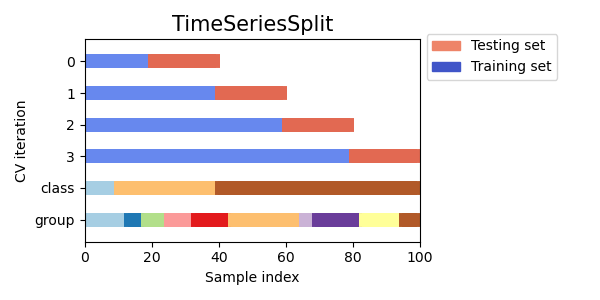    
    

    
------------
    
Предвижу аргумент "я не использую кросс-валидацию". По факту если ты не указываешь количество фолдов, то используется дефолтное разбиение на 5 фолдов.    

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Исправил. За это отдельное спасибо!!!

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [48]:
grid_search.fit(X_train, y_train)

Learning rate set to 0.050868
0:	learn: 37.8503639	total: 142ms	remaining: 2m 21s
1:	learn: 37.0202882	total: 144ms	remaining: 1m 11s
2:	learn: 36.2263527	total: 146ms	remaining: 48.5s
3:	learn: 35.5303075	total: 148ms	remaining: 36.8s
4:	learn: 34.8487097	total: 150ms	remaining: 29.8s
5:	learn: 34.1550227	total: 152ms	remaining: 25.2s
6:	learn: 33.5441238	total: 154ms	remaining: 21.9s
7:	learn: 32.9537563	total: 156ms	remaining: 19.4s
8:	learn: 32.4094648	total: 158ms	remaining: 17.4s
9:	learn: 31.9276312	total: 160ms	remaining: 15.9s
10:	learn: 31.4112240	total: 162ms	remaining: 14.6s
11:	learn: 30.9745267	total: 164ms	remaining: 13.5s
12:	learn: 30.5808483	total: 166ms	remaining: 12.6s
13:	learn: 30.2125165	total: 168ms	remaining: 11.9s
14:	learn: 29.8656199	total: 170ms	remaining: 11.2s
15:	learn: 29.5357339	total: 173ms	remaining: 10.6s
16:	learn: 29.1801339	total: 175ms	remaining: 10.1s
17:	learn: 28.8438323	total: 177ms	remaining: 9.63s
18:	learn: 28.5651054	total: 179ms	remaini

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['shift_1', 'shift_2', 'shift_3', 'shift_4', 'shift_5', 'shift_6',
       'shift_7', 'shift_8', 'shift_9', 'shift_10', 'shift_11', 'shift_12',
       'shift_13', 's...
                          'models__max_depth': range(1, 15)},
                         {'models': [LinearRegression()],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [SVR()],
                          'models__kernel': ['linear', 'rbf'],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [<catboost.core.CatBoostRegressor object at 0x0000023C664E0C50>]}],
             scoring='neg_root_mean_squared_error')

In [49]:
predicts = grid_search.predict(X_test)

In [50]:
rmse = mean_squared_error(y_test, predicts, squared=False)

C:\Users\Marat\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
print('Значение метрики RMSE на тестовой выборке', rmse)

Значение метрики RMSE на тестовой выборке 40.44527992524053


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец: 
    
  - тестирование произведено корректно 
  - достигнута хорошая точность на тестовой выборке
    
Но кроме вычисления метрики было бы неплохо сделать визуализацию со сравнением фактических данных и лучшего прогноза. 
</div>


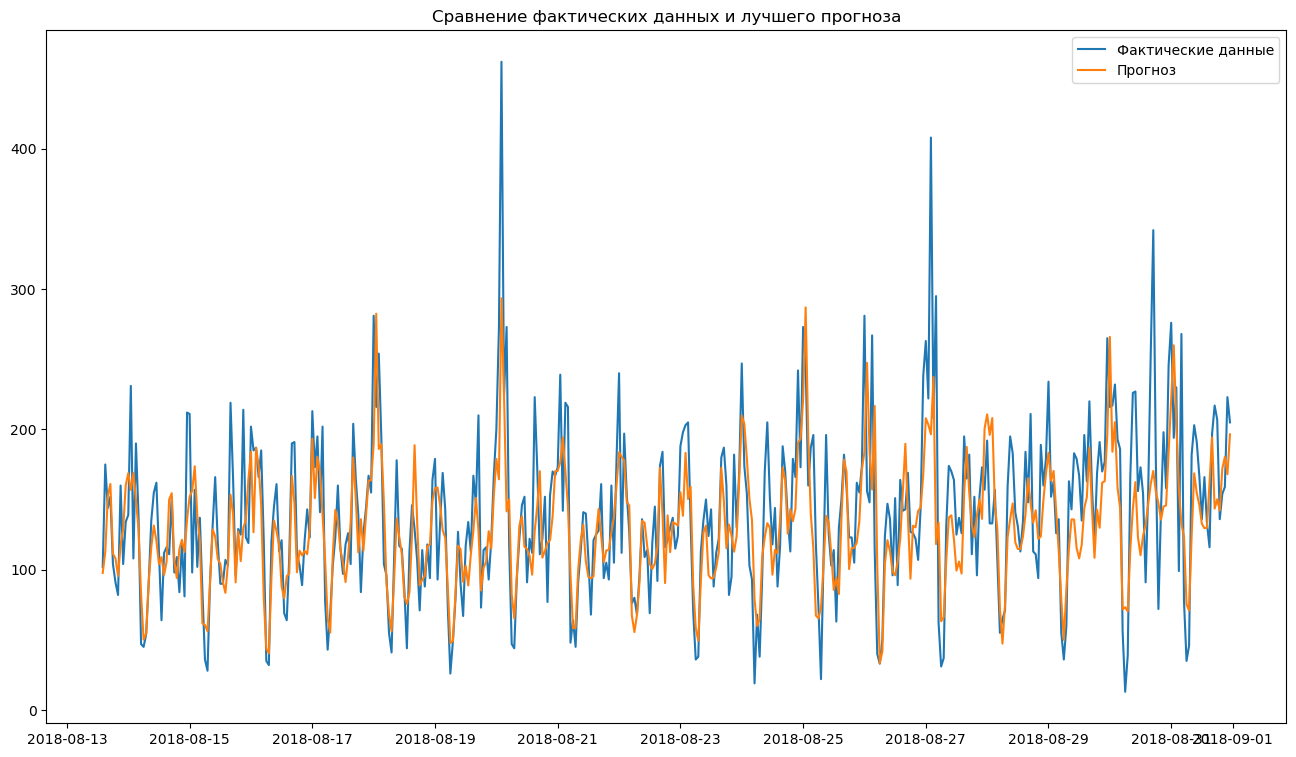

In [52]:
plt.figure(figsize=(16, 9))
plt.plot(y_test, label='Фактические данные')
plt.plot(
    pd.DataFrame(predicts, index=y_test.index),
    label='Прогноз'
)
plt.legend()
plt.title('Cравнение фактических данных и лучшего прогноза')
plt.show()

Удалось спрогнозировать сезонность и тренд на увеличение кол-ва заказов такси

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Исправил. А как предсказывать пики? Просо зачем нужно ML, если можно было тоже самое сделать просто по истории заказов? Похоже дальше шел ответ на мой вопрос) Вы правы при сдвиге в 168 часов ошибка по бытовому предсказанаю около 39, но проблема в том, что у меня комп "висит" при построении модели, поэтому взял суточный сдвиг.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 <b>v2</b> Очень хороший вопрос "Зачем нужно ML".  Скажу так - многие задачи без ML было бы  решать очень сложно и машинное обучение действительно спасает (как минимум от ручного "кодирования правил". 

Но как и любой инструмент ML не панацея. Поэтому если можно обойтись без ML, разве это плохо?  Все зависит от задачи и от контекста.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Также советую проверить полученную модель на адекватность.
    
Во временных рядах кроме обычного Dummy предсказания (например среднего для задачи регрессии) можно использовать и специфичные бейзлайны. Например предсказание предыдущим значением ряда. А учитывая имеющуюся в данных сезонность, можно попробовать использовать простые эвристики, известные каждому таксисту или диспетчеру: 
    
  - предсказание значением этого же часа с предыдущих суток 
  - или значением этого же часа и этого же дня недели с предыдущей недели 
    
Т.е. берем лаги 24 и 168 соответственно.
    
------------------
    
Этот комментаий часто не замечают,поэтому попробую подчеркнуть его важность.  Если просто взять предсказание "даными с прошлой недели",  т.е. просто берем lag168 в качестве ответов, то ошибка на тестовой выборке составит чуть больше 39. И это безо всякого машинного обучения. Поэтому нам важно побить этот бейзлайн.  Иначе, презентуя свою модель директору таксопарка мы будем иметь бледный вид.    
    
</div>

In [53]:
print(len(y_test))
print(y_test.head(1))
print(y_test.tail(1))

442
datetime
2018-08-13 14:00:00    102
Freq: h, Name: num_orders, dtype: int64
datetime
2018-08-31 23:00:00    205
Freq: h, Name: num_orders, dtype: int64


In [54]:
print(taxi['num_orders'][y_test.head(1).index - timedelta(days=1)])
print(taxi['num_orders'][y_test.tail(1).index - timedelta(days=1)])

datetime
2018-08-12 14:00:00    104
Freq: h, Name: num_orders, dtype: int64
datetime
2018-08-30 23:00:00    246
Freq: h, Name: num_orders, dtype: int64


In [55]:
rmse = mean_squared_error(y_test, taxi['num_orders']['2018-08-12 14:00:00':'2018-08-30 23:00:00'], squared=False)

C:\Users\Marat\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
print('Значение метрики RMSE при использовании суточного сдвига', rmse)

Значение метрики RMSE при использовании суточного сдвига 57.187059099999075


Модель на базе CatBoostRegressor превзошла результат "бытового" предсказания

## Вывод

Добиться нужного значения метрики удалось только при CatBoostRegressor

**Вопросы:**
1) почему модели очень чувствительны к значению у rolling. Например, при изменении окна с 7 на 8, метрика может измениться на 10 процентов. Можно ли считать такие колебания устойчивой моделью?

 <img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Любая модель чувствительна к признакам. В случае скользящего среднего лучше подобрать его так, чтобы она лучше описывала тренд. Чем стабильнее,тем лучше.  А значит разумно брать либо суточное либо недельне усреднение.
    
Ну и о важности отстающих значений я тебе тоже очень подробно написал выше.    

</div>


<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

В целом мне все понравилось: твоя работа выполнена на хорошем уровне, ты изучил данные, нашел сезоность и тренд,  корректно подготовил признаки и обучил модели. Также в проекте много графиков и пояснений.

Мне очень понравилось что ты нашел и визуализировал внутрисуточную сезонность.
    
    
Что нужно доработать обязательно:
 - исследование временного ряда лучше начать с визуализации графика этого ряда
 - пожалуйста поработай с читаемостью графика seasonal_decompose
 - нужно удалить календарный признак "месяц"
 - модель логистической регрессии - это модель классификации, а мы решаем задачу регрессии
 - При выполнении кросс-валидации для временых рядов нужно следить, чтобы фолды не перемешивались.    

    
Желтые комментарии на твое усмотрение. Но очень советую уделить внимание признакам "количество отстающих значений" и "размер окна для скользящего среднего".
    
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Дополнительные материалы </b>

Если решишь глубже погрузиться в тему временных рядов, думаю тебе стоит знать что подход, изученный в курсе далеко не единственный. Вот к чему возможно стоит обратиться:
 - Авторегрессионные модели семейства ARIMA. В качестве экскурса очень полезно следующее видео: https://www.youtube.com/watch?v=u433nrxdf5k&t=110s
 - Библиотека prophet от Facebook. По моим наблюдениям, качество решения этой моделью ниже, но она очень проста в применении. https://habr.com/ru/company/ods/blog/323730/
    
 - Урок по временным рядам из курса ML от ODS (https://habr.com/ru/company/ods/blog/327242/)
 - Лекция по прогнозированию временных рядов из курса Computer Science Center (https://www.youtube.com/watch?v=COBcXzKmOyk)   


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Огромное спасибо за комментарии. Похоже в этом деле надо иметь очень хорошего наставника, чтобы прокачаться до нужного уровня)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>
И снова привет!
    
Насчет наставника - тут я не готов комментировать.  Во первых важен наверное какой-то критический объем времени, сколько ты "вкатываешься" в новую профессию и начинаешь видеть детали. Важна насмотренность, рефлексия.   Хотя наверняка и хороший ментор тоже может помочь и немного сберечь время, но в любом случае, большую часть работы ты должен выполнять сам.    
    
---------------
    
Вижу что ты проработал мои комментарии. Теперь проект может быть принят. Поздравляю и желаю дальнейших успехов!

</div>